<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/week2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, I learned how to apply Linear Regression to a real-world housing dataset and explain the model’s predictions using SHAP. I first loaded the California housing data and selected the median house value as the target variable. The dataset was then split into training and testing sets, which helped me understand how models are evaluated on unseen data.

After training the model, I measured its performance using Mean Squared Error and R² score. These metrics showed how accurately the model predicted house prices. This helped me understand the importance of model evaluation.

I then used SHAP to explain the model’s predictions. The SHAP summary plot showed which features had the biggest impact on house prices, while the bar plot clearly ranked feature importance. This made the model more interpretable and easier to trust.

Overall, this lab helped me understand how to build, evaluate, and explain a regression model using real data.:

Mean Squared Error: 4634658406.223264
R² Score: 0.6636396350243869


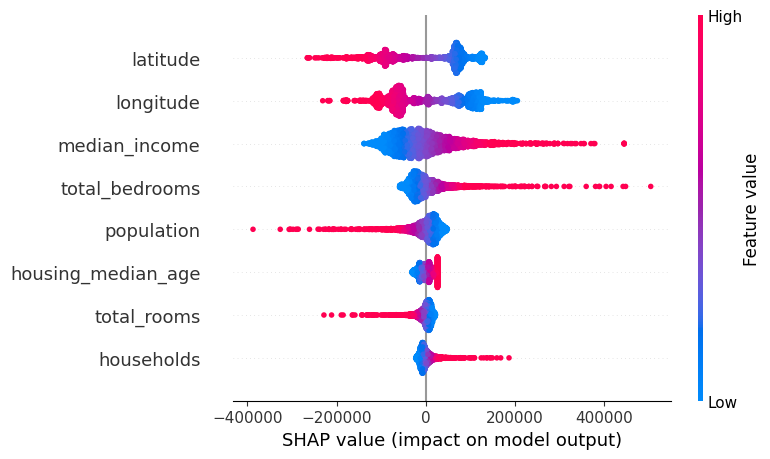

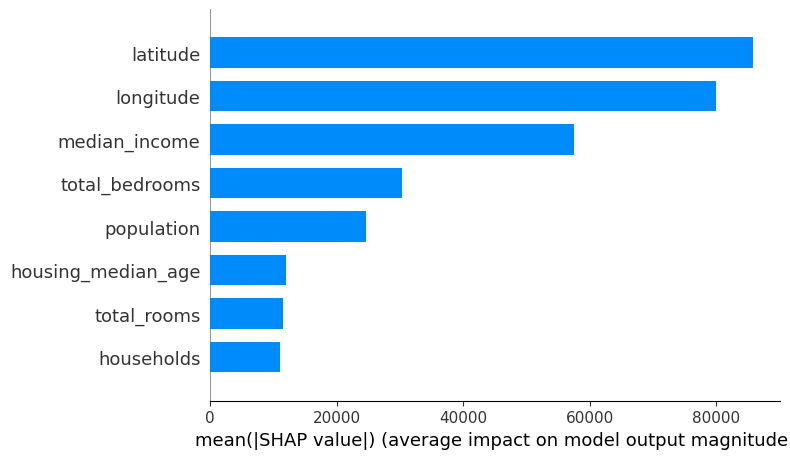

In [ ]:
# Install SHAP
!pip install shap --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Fix SHAP numpy warnings
if not hasattr(np, "bool"):
    np.bool = bool
if not hasattr(np, "float"):
    np.float = float

# ----------------------------
# 1. Load Your Dataset
# ----------------------------
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

# ----------------------------
# 2. Select features + target
# ----------------------------
target = 'median_house_value'

X = df.drop(columns=[target])
y = df[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Train Linear Regression
# ----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# ----------------------------
# 4. SHAP Explanation
# ----------------------------
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP Feature Importance (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")